In [83]:
%matplotlib inline
import itertools
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import datetime
from matplotlib import markers

In [84]:
df = pd.read_csv('sanfrancisco_incidents_summer_2014.csv',
                    parse_dates=['Date'],
                    infer_datetime_format=True)
ind=pd.DatetimeIndex(df.Time)
df['Time']=ind.hour

In [85]:
dfmany=df.pivot_table('IncidntNum',aggfunc=lambda x:len(x),index=['Date','Time'],columns='Category').fillna(0)
dfhourly=dfmany.pivot_table(index='Time').fillna(0)
bymonths=[]
for i in dfmany.index.droplevel(1):    
    bymonths.append(datetime.datetime.strptime(str(i), '%Y-%m-%d %H:%M:%S').strftime("%m"))
# dfmany['Month']=bymonths
# dfmonthly=dfmany.pivot_table(index='Month')

In [86]:
dfsessions=dfhourly.copy()
dfind=dfhourly.sum().sort_values()[0:20].index
dfsessions.drop(dfind,axis=1,inplace=True)
parts=[]
for i in range(24):
    if i<6: parts.append('Early Morning')
    elif i<12 and i>5:parts.append('Morning')
    elif i>11 and i<18:parts.append('Afternoon')    
    else: parts.append('Evening')
dfsessions['PartsOfDay']=pd.Series(parts)
dfsessions=dfsessions.reset_index()
dfsessions=dfsessions.set_index(['PartsOfDay','Time'])

dfearly=dfsessions[dfsessions.index.droplevel(1)=='Early Morning']
dfmorning=dfsessions[dfsessions.index.droplevel(1)=='Morning']
dfnoon=dfsessions[dfsessions.index.droplevel(1)=='Afternoon']
dfevening=dfsessions[dfsessions.index.droplevel(1)=='Evening']
allcrimes=dfhourly.sum(axis=1)
allmonths=dfmonthly.sum(axis=1)

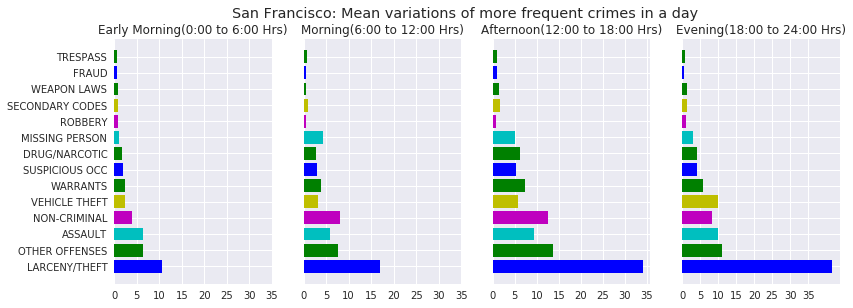

In [87]:
fig,ax=plt.subplots(1,4,figsize=(13, 4.5),sharey=True)
df0=dfearly.sum().sort_values(ascending=False)
d=df0
xx=ax[0]
xx.barh(np.arange(len(d)), df0, align='center',color=['b', 'g', 'c', 'm', 'y', 'g'])
xx.set_yticks(np.arange(len(d)))
xx.set_xticks(np.array([0,5,10,15,20,25,30,35]))
xx.set_yticklabels(df0.index)    
xx.set_title(dfearly.index.droplevel(1)[0] + '({x}:00 to {y}:00 Hrs)'.format(x=dfearly.index.droplevel(0)[0],y=dfearly.index.droplevel(0)[5]+1))

df1=dfmorning.sum().sort_values(ascending=False).reindex(df0.index)
xx=ax[1]
xx.barh(np.arange(len(d)), df1, align='center',color=['b', 'g', 'c', 'm', 'y', 'g'])
xx.set_yticks(np.arange(len(d)))
xx.set_xticks(np.array([0,5,10,15,20,25,30,35]))
# xx.set_yticklabels(d.index)    
xx.set_title(dfmorning.index.droplevel(1)[0] + '({x}:00 to {y}:00 Hrs)'.format(x=dfmorning.index.droplevel(0)[0],y=dfmorning.index.droplevel(0)[5]+1))
# xx.invert_xaxis()
# xx.yaxis.tick_right()

df2=dfnoon.sum().reindex(df0.index)
xx=ax[2]
xx.barh(np.arange(len(d)), df2, align='center',color=['b', 'g', 'c', 'm', 'y', 'g'])
xx.set_yticks(np.arange(len(d)))
xx.set_xticks(np.array([0,5,10,15,20,25,30,35]))
# xx.set_yticklabels(d.index)    
xx.set_title(dfnoon.index.droplevel(1)[0] + '({x}:00 to {y}:00 Hrs)'.format(x=dfnoon.index.droplevel(0)[0],y=dfnoon.index.droplevel(0)[5]+1))
# xx.invert_xaxis()
# xx.yaxis.tick_right()

df3=dfevening.sum().reindex(df0.index)
xx=ax[3]
xx.barh(np.arange(len(d)), df3, align='center',color=['b', 'g', 'c', 'm', 'y', 'g'])
xx.set_yticks(np.arange(len(d)))
xx.set_xticks(np.array([0,5,10,15,20,25,30,35]))
# xx.set_yticklabels(d.index)    
xx.set_title(dfevening.index.droplevel(1)[0] + '({x}:00 to {y}:00 Hrs)'.format(x=dfevening.index.droplevel(0)[0],y=dfevening.index.droplevel(0)[5]+1))
fig.suptitle('San Francisco: Mean variations of more frequent crimes in a day')  
plt.savefig('sanfreqcrimes.png', bbox_inches='tight')

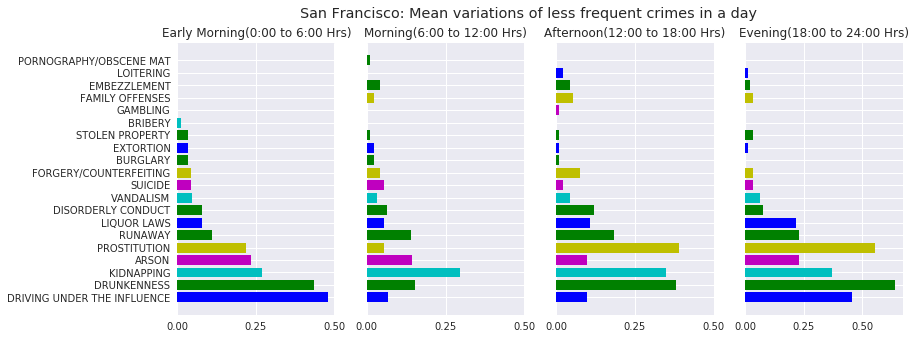

In [88]:
dfsessions=dfhourly.copy()
dfind=dfhourly.sum().sort_values()[20:len(dfhourly.sum())].index
dfsessions.drop(dfind,axis=1,inplace=True)
parts=[]
for i in range(24):
    if i<6: parts.append('Early Morning')
    elif i<12 and i>5:parts.append('Morning')
    elif i>11 and i<18:parts.append('Afternoon')    
    else: parts.append('Evening')
dfsessions['PartsOfDay']=pd.Series(parts)
dfsessions=dfsessions.reset_index()
dfsessions=dfsessions.set_index(['PartsOfDay','Time'])

dfearly=dfsessions[dfsessions.index.droplevel(1)=='Early Morning']
dfmorning=dfsessions[dfsessions.index.droplevel(1)=='Morning']
dfnoon=dfsessions[dfsessions.index.droplevel(1)=='Afternoon']
dfevening=dfsessions[dfsessions.index.droplevel(1)=='Evening']



fig,ax=plt.subplots(1,4,figsize=(13, 5),sharey=True)
df0=dfearly.sum().sort_values(ascending=False)
d=df0
xx=ax[0]
xx.barh(np.arange(len(d)), df0, align='center',color=['b', 'g', 'c', 'm', 'y', 'g'])
xx.set_yticks(np.arange(len(d)))
xx.set_xticks(np.array([0,0.25,0.5]))
xx.set_yticklabels(df0.index)    
xx.set_title(dfearly.index.droplevel(1)[0] + '({x}:00 to {y}:00 Hrs)'.format(x=dfearly.index.droplevel(0)[0],y=dfearly.index.droplevel(0)[5]+1))

df1=dfmorning.sum().sort_values(ascending=False).reindex(df0.index)
xx=ax[1]
xx.barh(np.arange(len(d)), df1, align='center',color=['b', 'g', 'c', 'm', 'y', 'g'])
xx.set_yticks(np.arange(len(d)))
xx.set_xticks(np.array([0,0.25,0.5]))
# xx.set_yticklabels(d.index)    
xx.set_title(dfmorning.index.droplevel(1)[0] + '({x}:00 to {y}:00 Hrs)'.format(x=dfmorning.index.droplevel(0)[0],y=dfmorning.index.droplevel(0)[5]+1))
# xx.invert_xaxis()
# xx.yaxis.tick_right()

df2=dfnoon.sum().reindex(df0.index)
xx=ax[2]
xx.barh(np.arange(len(d)), df2, align='center',color=['b', 'g', 'c', 'm', 'y', 'g'])
xx.set_yticks(np.arange(len(d)))
xx.set_xticks(np.array([0,0.25,0.5]))
# xx.set_yticklabels(d.index)    
xx.set_title(dfnoon.index.droplevel(1)[0] + '({x}:00 to {y}:00 Hrs)'.format(x=dfnoon.index.droplevel(0)[0],y=dfnoon.index.droplevel(0)[5]+1))
# xx.invert_xaxis()
# xx.yaxis.tick_right()

df3=dfevening.sum().reindex(df0.index)
xx=ax[3]
xx.barh(np.arange(len(d)), df3, align='center',color=['b', 'g', 'c', 'm', 'y', 'g'])
xx.set_yticks(np.arange(len(d)))
xx.set_xticks(np.array([0,0.25,0.5]))
# xx.set_yticklabels(d.index)    
xx.set_title(dfevening.index.droplevel(1)[0] + '({x}:00 to {y}:00 Hrs)'.format(x=dfevening.index.droplevel(0)[0],y=dfevening.index.droplevel(0)[5]+1))
fig.suptitle('San Francisco: Mean variations of less frequent crimes in a day')  
plt.savefig('sanlesscrimes.png', bbox_inches='tight')

In [89]:
rob=dfhourly['ROBBERY']
%store rob

Stored 'rob' (Series)


In [90]:
%store sanallcrimes

Stored 'sanallcrimes' (Series)
